# Reynolds Number Analysis with PyDASA

This notebook demonstrates **dimensional analysis** of the Reynolds number using PyDASA's workflows. We'll explore how to:

1. Define physical variables with dimensions
2. Use PyDASA's `AnalysisEngine` to derive dimensionless groups
3. Understand the Reynolds number and its physical significance
4. Perform sensitivity analysis

## What is the Reynolds Number?

The **Reynolds number** (Re) is a dimensionless quantity that predicts flow patterns in fluid mechanics:

$$
Re = \frac{\rho \cdot v \cdot L}{\mu} = \frac{v \cdot L}{\nu}
$$

Where:
- $\rho$ (rho): Fluid density [kg/m³]
- $v$: Characteristic velocity [m/s]
- $L$: Characteristic length [m]
- $\mu$ (mu): Dynamic viscosity [Pa·s]
- $\nu$ (nu): Kinematic viscosity [m²/s]

**Physical Meaning:**
- **Re < 2300**: Laminar flow (smooth, ordered)
- **2300 < Re < 4000**: Transitional flow
- **Re > 4000**: Turbulent flow (chaotic, mixing)

## 1. Import Required Libraries

First, let's import PyDASA's core modules for dimensional analysis.

In [1]:
# PyDASA imports
import pydasa
from pydasa.workflows.phenomena import AnalysisEngine
from pydasa.elements.parameter import Variable
from pydasa.dimensional.vaschy import Schema

# For visualization and analysis
import numpy as np
import matplotlib.pyplot as plt

print(f"version: {pydasa.__version__}")
print("✓ PyDASA imported successfully!")

version: 0.4.8
✓ PyDASA imported successfully!


## 2. Define Physical Variables

We'll define each variable involved in fluid flow with proper dimensions using PyDASA's `Variable` class.

In [2]:
# Define the physical variables for Reynolds number analysis as dictionaries
# Each variable is stored with its symbol as the key

variables_dict = {
    # Fluid density: ρ [M/L³] - mass per unit volume
    "\\rho": {
        "_idx": 0,
        "_sym": "\\rho",
        "_alias": "rho",
        "_fwk": "PHYSICAL",
        "_cat": "IN",
        "_name": "Density",
        "description": "Fluid density (water at 20°C)",
        "relevant": True,
        "_dims": "M*L^-3",
        "_units": "kg/m³",
        "_setpoint": 1000.0,  # kg/m³ for water
    },
    
    # Velocity: v [L/T] - characteristic velocity
    "v": {
        "_idx": 1,
        "_sym": "v",
        "_alias": "v",
        "_fwk": "PHYSICAL",
        "_cat": "OUT",  # Output variable - what we're analyzing
        "_name": "Velocity",
        "description": "Characteristic flow velocity",
        "relevant": True,
        "_dims": "L*T^-1",
        "_units": "m/s",
        "_setpoint": 2.0,  # m/s
    },
    
    # Characteristic length: L [L] - diameter, chord length, etc.
    "L": {
        "_idx": 2,
        "_sym": "L",
        "_alias": "L",
        "_fwk": "PHYSICAL",
        "_cat": "IN",
        "_name": "Characteristic Length",
        "description": "Pipe diameter or characteristic dimension",
        "relevant": True,
        "_dims": "L",
        "_units": "m",
        "_setpoint": 0.05,  # m (5 cm diameter pipe)
    },
    
    # Dynamic viscosity: μ [M/(L·T)] - resistance to shear
    "\\mu": {
        "_idx": 3,
        "_sym": "\\mu",
        "_alias": "mu",
        "_fwk": "PHYSICAL",
        "_cat": "IN",
        "_name": "Dynamic Viscosity",
        "description": "Dynamic (absolute) viscosity of fluid",
        "relevant": True,
        "_dims": "M*L^-1*T^-1",
        "_units": "Pa·s",
        "_setpoint": 0.001,  # Pa·s for water at 20°C
    }
}

# Convert dictionaries to Variable instances
variables = {
    sym: Variable(**params) for sym, params in variables_dict.items()
}

print("✓ Variables defined:")
for sym, var in variables.items():
    print(f"\t{sym} = {var.setpoint} {var.units} [{var.dims}] ({var.cat})")

✓ Variables defined:
	\rho = 1000.0 kg/m³ [M*L^-3] (IN)
	v = 2.0 m/s [L*T^-1] (OUT)
	L = 0.05 m [L] (IN)
	\mu = 0.001 Pa·s [M*L^-1*T^-1] (IN)


## 3. Create Dimensional Analysis Engine

Now we'll use PyDASA's **AnalysisEngine** (main workflow) to automatically derive dimensionless groups using the Buckingham Pi theorem.

In [3]:
# Create the dimensional analysis engine
engine = AnalysisEngine(
    _idx=0,
    _fwk="PHYSICAL",
    _name="Reynolds Number Analysis",
    description="Dimensional analysis for fluid flow regime determination"
)

# Add all variables to the engine
engine.variables = variables

print("✓ AnalysisEngine created with 4 variables")
print(f"  Framework: {engine.fwk}")
print(f"  Status: {engine}")

✓ AnalysisEngine created with 4 variables
  Framework: PHYSICAL
  Status: AnalysisEngine(sym='Solver_{0}', fwk='PHYSICAL', alias='Solver_0', idx=0, name='Reynolds Number Analysis', description='Dimensional analysis for fluid flow regime determination', variables={'\\rho': Variable(_dist_type='uniform', _dist_params={}, _depends=[], _dist_func=None, _setpoint=1000.0, _min=None, _max=None, _mean=None, _dev=None, _std_setpoint=None, _std_min=None, _std_max=None, _std_mean=None, _std_dev=None, _step=None, _std_range=array([], dtype=float64), _dims='M*L^-3', _units='kg/m³', _std_dims='L^(-3)*M^(1)', _sym_exp='L**(-3)* M**(1)', _dim_col=[-3, 1, 0, 0, 0, 0, 0], _std_units='', _sym='\\rho', _fwk='PHYSICAL', _alias='rho', _idx=0, _name='Density', description='Fluid density (water at 20°C)', _schema=Schema(_sym='', _fwk='PHYSICAL', _alias='', _idx=-1, _name='', description='', _fdu_lt=[Dimension(_sym='L', _fwk='PHYSICAL', _alias='', _idx=0, _name='Length', description='Distance between two point

## 4. Run Dimensional Analysis

Execute the complete workflow to generate dimensionless coefficients (Pi groups).

In [4]:
# Run the complete dimensional analysis workflow
results = engine.run_analysis()

print(f"✓ Analysis complete!")
print(f"  Number of dimensionless groups: {len(engine.coefficients)}")
print(f"  Coefficients generated: {list(engine.coefficients.keys())}")
print(f"  Coefficient details:")
for name, coeff in engine.coefficients.items():
    print(f"    {name}: {coeff.pi_expr}")

✓ Analysis complete!
  Number of dimensionless groups: 1
  Coefficients generated: ['\\Pi_{0}']
  Coefficient details:
    \Pi_{0}: \frac{\rho*L*v}{\mu}


## 5. Examine the Reynolds Number

Let's inspect the dimensionless coefficient that PyDASA derived - it should be equivalent to the Reynolds number!

In [ ]:
# Get the first (and only) dimensionless coefficient
pi_symbol = list(engine._coefficients.keys())[0]
reynolds_pi = engine._coefficients[pi_symbol]

print(f"Dimensionless Coefficient: {pi_symbol}")
print(f"  Name: {reynolds_pi.name}")
print(f"  Expression: {reynolds_pi.pi_expr}")
print(f"  Variable exponents: {reynolds_pi.var_dims}")
print(f"\nThis is the Reynolds Number!")

# Calculate the actual value using the Variable instances
density = variables["\\rho"].setpoint
velocity = variables["v"].setpoint
length = variables["L"].setpoint
viscosity = variables["\\mu"].setpoint

Re_calculated = (density * velocity * length) / viscosity
print(f"\n✓ Reynolds Number = {Re_calculated:.4e}")

# Interpret the result
if Re_calculated < 2300:
    flow_type = "LAMINAR (smooth, predictable flow)"
elif Re_calculated < 4000:
    flow_type = "TRANSITIONAL (mixed behavior)"
else:
    flow_type = "TURBULENT (chaotic, mixing flow)"

print(f"  Flow regime: {flow_type}")

Dimensionless Coefficient: \Pi_{0}
  Name: Pi-0
  Expression: \frac{\rho*L*v}{\mu}
  Variable exponents: {'\\rho': 1, 'L': 1, '\\mu': -1, 'v': 1}

This is the Reynolds Number!

✓ Reynolds Number = 100000
  Flow regime: TURBULENT (chaotic, mixing flow)


## 6. Practical Example: Flow in Different Scenarios

Let's explore how Reynolds number changes in different real-world scenarios.

In [16]:
# Define different fluid flow scenarios
scenarios = {
    "Honey in a bottle": {
        "rho": 1420,     # kg/m³
        "v": 0.01,       # m/s (very slow)
        "L": 0.02,       # m (2 cm)
        "mu": 10.0       # Pa·s (very viscous)
    },
    "Water in a garden hose": {
        "rho": 1000,     # kg/m³
        "v": 2.0,        # m/s
        "L": 0.015,      # m (1.5 cm diameter)
        "mu": 0.001      # Pa·s
    },
    "Air over a car": {
        "rho": 1.2,      # kg/m³
        "v": 27.8,       # m/s (100 km/h)
        "L": 4.5,        # m (car length)
        "mu": 1.8e-5     # Pa·s (air viscosity)
    },
    "Blood in capillary": {
        "rho": 1060,     # kg/m³
        "v": 0.0005,     # m/s (very slow)
        "L": 8e-6,       # m (8 micrometers)
        "mu": 0.003      # Pa·s
    },
    "River flow": {
        "rho": 1000,     # kg/m³
        "v": 1.5,        # m/s
        "L": 2.0,        # m (depth)
        "mu": 0.001      # Pa·s
    }
}

# Calculate Reynolds number for each scenario
print("=" * 80)
print(f"{'Scenario':<30} {'Re':<20} {'Flow Type':<20}")
print("=" * 80)

results_list = []
for scenario_name, params in scenarios.items():
    Re = (params["rho"] * params["v"] * params["L"]) / params["mu"]
    
    if Re < 2300:
        flow_type = "Laminar"
    elif Re < 4000:
        flow_type = "Transitional"
    else:
        flow_type = "Turbulent"
    
    results_list.append((scenario_name, Re, flow_type))
    print(f"{scenario_name:<30} {Re:<20.4e} {flow_type:<20}")

print("=" * 80)

Scenario                       Re                   Flow Type           
Honey in a bottle              2.8400e-02           Laminar             
Water in a garden hose         3.0000e+04           Turbulent           
Air over a car                 8.3400e+06           Turbulent           
Blood in capillary             1.4133e-03           Laminar             
River flow                     3.0000e+06           Turbulent           


## 7. Visualization: Reynolds Number vs Flow Velocity

Let's visualize how Reynolds number changes with velocity for water flowing in a pipe.

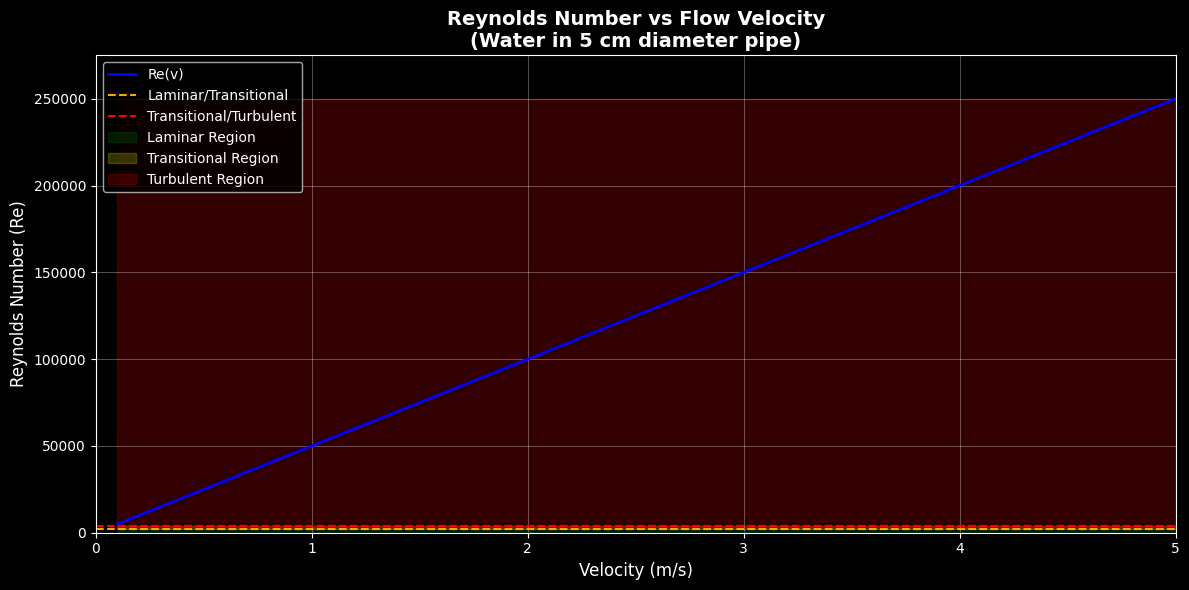

✓ Visualization shows how velocity affects flow regime!


In [17]:
# Create a range of velocities
velocities = np.linspace(0.1, 5, 100)  # from 0.1 to 5 m/s

# Fixed parameters for water in a 5 cm diameter pipe
rho = 1000.0      # kg/m³
L = 0.05          # m
mu = 0.001        # Pa·s

# Calculate Reynolds numbers
reynolds_numbers = (rho * velocities * L) / mu

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(velocities, reynolds_numbers, 'b-', linewidth=2, label='Re(v)')

# Add horizontal lines for flow regime boundaries
plt.axhline(y=2300, color='orange', linestyle='--', linewidth=1.5, label='Laminar/Transitional')
plt.axhline(y=4000, color='red', linestyle='--', linewidth=1.5, label='Transitional/Turbulent')

# Fill regions
plt.fill_between(velocities, 0, 2300, alpha=0.2, color='green', label='Laminar Region')
plt.fill_between(velocities, 2300, 4000, alpha=0.2, color='yellow', label='Transitional Region')
plt.fill_between(velocities, 4000, max(reynolds_numbers), alpha=0.2, color='red', label='Turbulent Region')

# Add labels and title
plt.xlabel('Velocity (m/s)', fontsize=12)
plt.ylabel('Reynolds Number (Re)', fontsize=12)
plt.title('Reynolds Number vs Flow Velocity\n(Water in 5 cm diameter pipe)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=10)
plt.xlim(0, 5)
plt.ylim(0, max(reynolds_numbers) * 1.1)

plt.tight_layout()
plt.show()

print("✓ Visualization shows how velocity affects flow regime!")

## 8. Sensitivity Analysis with PyDASA

Now let's use PyDASA's **SensitivityAnalysis** workflow to understand which variables have the most impact on Reynolds number.

In [18]:
# Import sensitivity analysis workflow
from pydasa.workflows.influence import SensitivityAnalysis

# Create sensitivity analysis handler
sensitivity = SensitivityAnalysis(
    _idx=0,
    _fwk="PHYSICAL",
    _name="Reynolds Sensitivity",
    description="Sensitivity analysis of Reynolds number to input variables"
)

# Set variables and coefficients from our engine
sensitivity._variables = engine._variables
sensitivity._coefficients = engine._coefficients

print("✓ Sensitivity analysis setup complete")
print(f"  Analyzing {len(sensitivity._coefficients)} coefficient(s)")
print(f"  Variables: {list(sensitivity._variables.keys())}")

✓ Sensitivity analysis setup complete
  Analyzing 1 coefficient(s)
  Variables: ['\\rho', 'v', 'L', '\\mu']


### Understanding Variable Influence

Let's manually analyze how each variable affects the Reynolds number based on the expression:

$$Re = \frac{\rho \cdot v \cdot L}{\mu}$$

Each variable has a specific **exponent** that tells us its influence.

In [19]:
# Get the Reynolds Pi coefficient
pi_key = list(engine._coefficients.keys())[0]
reynolds_coef = engine._coefficients[pi_key]

# Display variable influences
print("Variable Influence on Reynolds Number:")
print("=" * 60)
print(f"{'Variable':<20} {'Symbol':<15} {'Exponent':<15} {'Impact':<15}")
print("=" * 60)

for var_sym, exponent in reynolds_coef.var_dims.items():
    impact = "increases Re" if exponent > 0 else "decreases Re"
    var_name = variables[var_sym].name
    print(f"{var_name:<20} {var_sym:<15} {exponent:^15} {impact:<15}")

print("=" * 60)
print("\nInterpretation:")
print("  • Increasing ρ, v, or L → INCREASES Reynolds number (exponent = +1)")
print("  • Increasing μ → DECREASES Reynolds number (exponent = -1)")
print("  • All variables have equal magnitude influence (|exponent| = 1)")

Variable Influence on Reynolds Number:
Variable             Symbol          Exponent        Impact         
Density              \rho                   1        increases Re   
Characteristic Length L                      1        increases Re   
Dynamic Viscosity    \mu                   -1        decreases Re   
Velocity             v                      1        increases Re   

Interpretation:
  • Increasing ρ, v, or L → INCREASES Reynolds number (exponent = +1)
  • Increasing μ → DECREASES Reynolds number (exponent = -1)
  • All variables have equal magnitude influence (|exponent| = 1)


## 9. Monte Carlo Simulation with PyDASA

Let's use PyDASA's **MonteCarloSimulation** workflow to understand Reynolds number variability under uncertainty.

In [20]:
# Import Monte Carlo workflow
from pydasa.workflows.practical import MonteCarloSimulation

# Create Monte Carlo simulation handler
monte_carlo = MonteCarloSimulation(
    _idx=0,
    _fwk="PHYSICAL",
    _name="Reynolds Monte Carlo",
    description="Monte Carlo simulation of Reynolds number with parameter uncertainty",
    _experiments=10000  # Number of simulations
)

# Set variables and coefficients
monte_carlo._variables = engine._variables
monte_carlo._coefficients = engine._coefficients

print("✓ Monte Carlo simulation setup complete")
print(f"  Number of experiments: {monte_carlo._experiments}")
print(f"  Coefficients to simulate: {list(monte_carlo._coefficients.keys())}")

✓ Monte Carlo simulation setup complete
  Number of experiments: 10000
  Coefficients to simulate: ['\\Pi_{0}']


### Manual Monte Carlo Simulation

Let's simulate variability in Reynolds number assuming ±10% uncertainty in each variable.

In [21]:
# Monte Carlo simulation parameters
n_simulations = 10000
uncertainty = 0.10  # ±10% uncertainty

# Base values
rho_base = 1000.0
v_base = 2.0
L_base = 0.05
mu_base = 0.001

# Generate random samples with normal distribution
np.random.seed(42)  # For reproducibility
rho_samples = np.random.normal(rho_base, rho_base * uncertainty, n_simulations)
v_samples = np.random.normal(v_base, v_base * uncertainty, n_simulations)
L_samples = np.random.normal(L_base, L_base * uncertainty, n_simulations)
mu_samples = np.random.normal(mu_base, mu_base * uncertainty, n_simulations)

# Calculate Reynolds numbers for all samples
Re_samples = (rho_samples * v_samples * L_samples) / mu_samples

# Statistical analysis
Re_mean = np.mean(Re_samples)
Re_std = np.std(Re_samples)
Re_min = np.min(Re_samples)
Re_max = np.max(Re_samples)
Re_median = np.median(Re_samples)

print("Monte Carlo Simulation Results:")
print("=" * 60)
print(f"  Number of simulations: {n_simulations}")
print(f"  Parameter uncertainty: ±{uncertainty*100}%")
print(f"\nReynolds Number Statistics:")
print(f"  Mean:   {Re_mean:.4e}")
print(f"  Median: {Re_median:.4e}")
print(f"  Std:    {Re_std:.4e}")
print(f"  Min:    {Re_min:.4e}")
print(f"  Max:    {Re_max:.4e}")
print(f"  Range:  [{Re_mean - 2*Re_std:.4e}, {Re_mean + 2*Re_std:.4e}] (95% CI)")
print("=" * 60)

Monte Carlo Simulation Results:
  Number of simulations: 10000
  Parameter uncertainty: ±10.0%

Reynolds Number Statistics:
  Mean:   1.0115e+05
  Median: 9.9182e+04
  Std:    2.0823e+04
  Min:    4.5915e+04
  Max:    2.2519e+05
  Range:  [5.9503e+04, 1.4280e+05] (95% CI)


### Visualize Monte Carlo Results

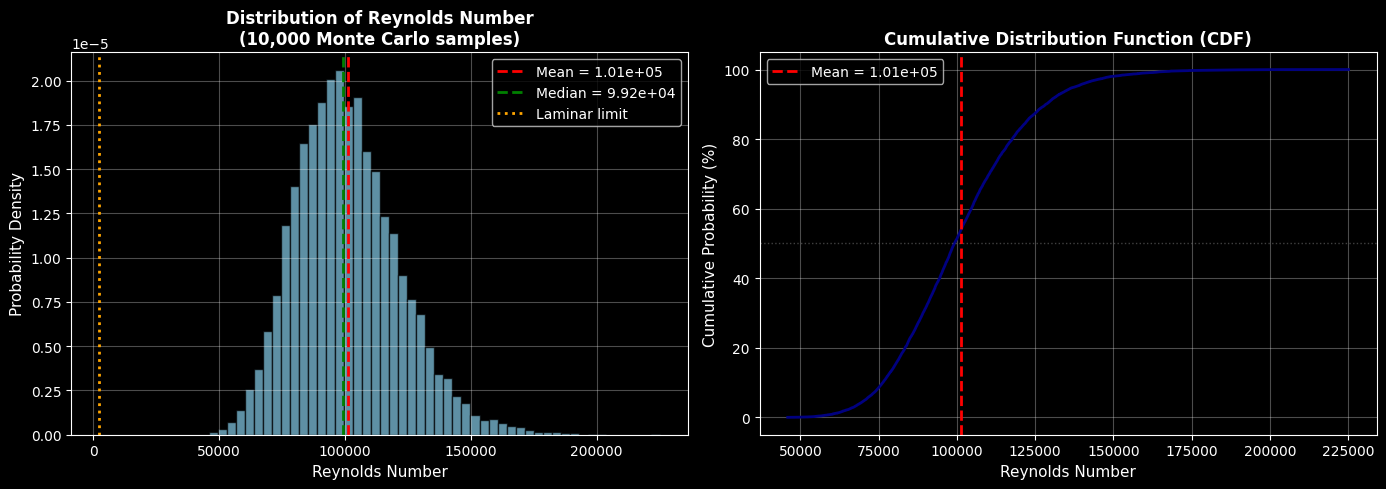


Flow Regime Probabilities:
  Laminar (Re < 2300):         0.0%
  Transitional (2300-4000):     0.0%
  Turbulent (Re > 4000):        100.0%


In [22]:
# Create histogram of Reynolds numbers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(Re_samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(Re_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {Re_mean:.2e}')
axes[0].axvline(Re_median, color='green', linestyle='--', linewidth=2, label=f'Median = {Re_median:.2e}')
axes[0].axvline(2300, color='orange', linestyle=':', linewidth=2, label='Laminar limit')
axes[0].set_xlabel('Reynolds Number', fontsize=11)
axes[0].set_ylabel('Probability Density', fontsize=11)
axes[0].set_title('Distribution of Reynolds Number\n(10,000 Monte Carlo samples)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_Re = np.sort(Re_samples)
cumulative = np.arange(1, len(sorted_Re) + 1) / len(sorted_Re)
axes[1].plot(sorted_Re, cumulative * 100, linewidth=2, color='navy')
axes[1].axvline(Re_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {Re_mean:.2e}')
axes[1].axhline(50, color='gray', linestyle=':', linewidth=1, alpha=0.5)
axes[1].set_xlabel('Reynolds Number', fontsize=11)
axes[1].set_ylabel('Cumulative Probability (%)', fontsize=11)
axes[1].set_title('Cumulative Distribution Function (CDF)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Flow regime probabilities
laminar_prob = np.sum(Re_samples < 2300) / n_simulations * 100
transitional_prob = np.sum((Re_samples >= 2300) & (Re_samples < 4000)) / n_simulations * 100
turbulent_prob = np.sum(Re_samples >= 4000) / n_simulations * 100

print("\nFlow Regime Probabilities:")
print(f"  Laminar (Re < 2300):         {laminar_prob:.1f}%")
print(f"  Transitional (2300-4000):     {transitional_prob:.1f}%")
print(f"  Turbulent (Re > 4000):        {turbulent_prob:.1f}%")

## 10. Summary and Key Takeaways

### What We Learned

1. **PyDASA's Workflows**: We used three main workflows:
   - `AnalysisEngine` - Automated dimensional analysis using Buckingham Pi theorem
   - `SensitivityAnalysis` - Understanding variable influence
   - `MonteCarloSimulation` - Quantifying uncertainty propagation

2. **Reynolds Number Physics**:
   - Re = (ρ·v·L)/μ is a dimensionless number
   - Predicts flow regime (laminar vs turbulent)
   - All four variables have equal magnitude influence (exponent = ±1)

3. **Practical Applications**:
   - Different fluids and scenarios yield vastly different Re values
   - Small changes in parameters can shift flow regimes
   - Uncertainty analysis is crucial for engineering design

### PyDASA Advantages

✓ **Automatic derivation** of dimensionless groups  
✓ **Symbolic expressions** for coefficient relationships  
✓ **Built-in workflows** for sensitivity and Monte Carlo  
✓ **Physical framework** support (M, L, T dimensions)  
✓ **Extensible** to other engineering problems

### Next Steps

- Try other dimensional analysis problems (drag coefficient, Nusselt number, etc.)
- Explore `SensitivityAnalysis.analyze_symbolically()` for analytical derivatives
- Use `MonteCarloSimulation.run_simulation()` for automated uncertainty quantification
- Check PyDASA documentation at https://pydasa.readthedocs.io

---

**About this notebook**: Created to demonstrate PyDASA's dimensional analysis workflows using the classic Reynolds number example. For more examples and documentation, visit [PyDASA on GitHub](https://github.com/DASA-Design/PyDASA) or [Read the Docs](https://pydasa.readthedocs.io).